In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
import statsmodels.api as sm

import sklearn as sk

pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None


In [66]:
# Major libraries
import scipy
import bottleneck # for speeding up pandas operations
import numexpr # ditto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Mining / EDA / dimensionality reduction
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import scale
from scipy.spatial.distance import euclidean

# Supervised learning
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised learning
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.colors import ListedColormap

%matplotlib inline
rng = np.random.RandomState(1)

In [67]:
# read the file and create a pandas dataframe
data = pd.read_csv('D:/shweta/Re-admission/Diabetes_read/diabetic_data.csv')

In [68]:
# check the dimensions of the data
data.shape

(101766, 50)

In [69]:
# first 5 rows of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [70]:
data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
        'number_outpatient','number_emergency','number_inpatient',
        'number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


{'boxes': [<matplotlib.lines.Line2D at 0xe19bb70>,
 'caps': [<matplotlib.lines.Line2D at 0xe1a65c0>,
 'fliers': [<matplotlib.lines.Line2D at 0xe1ad278>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe1a6e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0xe19bcc0>,
  <matplotlib.lines.Line2D at 0xe1adef0>]}

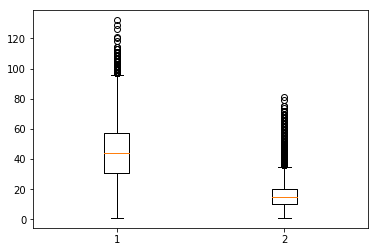

In [71]:
plt.boxplot([data['num_lab_procedures'], data['num_medications']])

In [72]:
#no of unique patien
len(np.unique(data['patient_nbr']))

71518

In [73]:
data = data.drop_duplicates(subset = 'patient_nbr', keep = 'first')

In [74]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Text(0,0.5,'Count')

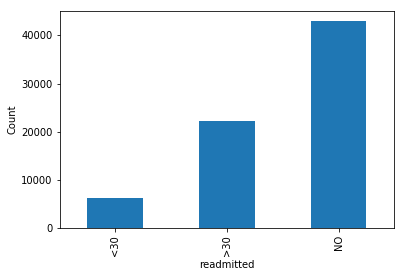

In [75]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [76]:
data['readmitted'] = pd.Series([0 if val in ['NO', '>30'] else  val 
                         for val in data['readmitted']], index=data.index)
data['readmitted'] = pd.Series([1 if val in ['<30'] else  val 
                         for val in data['readmitted']], index=data.index)

In [77]:
data.readmitted.value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

In [78]:
65225/71518

0.9120081657764478

Text(0,0.5,'Count')

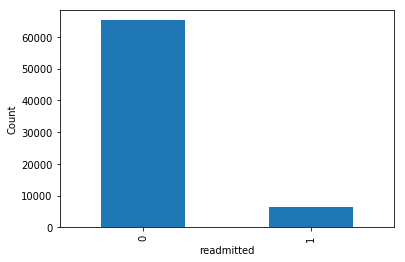

In [79]:
# plot 'readmitted' again to see the change
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [80]:
np.unique(data['readmitted'].values)

array([0, 1], dtype=int64)

In [81]:
# remove irrelevant features
data.drop(['encounter_id','patient_nbr', 'weight', 'payer_code'], axis=1, inplace=True)

In [82]:
# check NA in 'medical_specialty'
data[data['medical_specialty'] == '?'].shape[0] * 1.0 / data.shape[0]

0.4820744427976174

In [83]:
np.unique(data['medical_specialty'].values)

array(['?', 'AllergyandImmunology', 'Anesthesiology',
       'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
       'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma',
       'Endocrinology', 'Endocrinology-Metabolism',
       'Family/GeneralPractice', 'Gastroenterology', 'Gynecology',
       'Hematology', 'Hematology/Oncology', 'Hospitalist',
       'InfectiousDiseases', 'InternalMedicine', 'Nephrology', 'Neurology',
       'Neurophysiology', 'Obsterics&Gynecology-GynecologicOnco',
       'Obstetrics', 'ObstetricsandGynecology', 'Oncology',
       'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive',
       'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology',
       'Pediatrics', 'Pediatrics-CriticalCare',
       'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology',
       'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology',
       'Pediatrics-Pulmonology', 'Perinatology',
       'PhysicalMedicineandRehabilitation', 'PhysicianNotF

In [84]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3' and 'gender'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

In [85]:
data.shape

(68357, 46)

In [86]:
np.unique(data['age'].values)

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

Text(0,0.5,'Count')

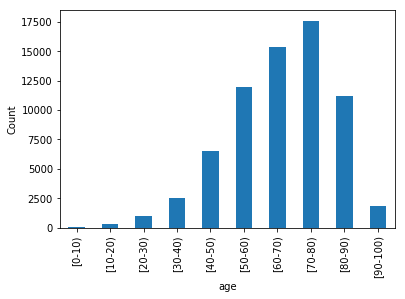

In [87]:
# check 'age' feature
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0,0.5,'Count')

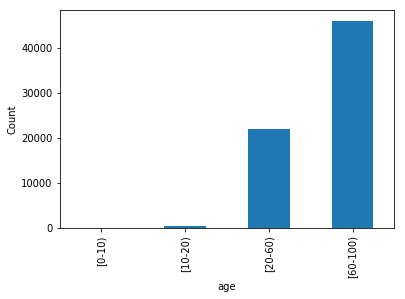

In [88]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['[20-60)' if val in ['[20-30)', '[30-40)', '[40-50)', '[50-60)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[60-100)' if val in ['[60-70)','[70-80)','[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0,0.5,'Count')

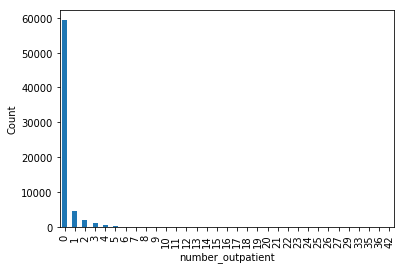

In [89]:
data.groupby('number_outpatient').size().plot(kind='bar')
plt.ylabel('Count')

Text(0,0.5,'Count')

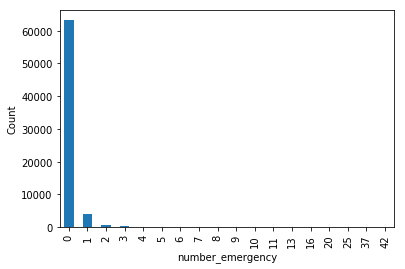

In [90]:
data.groupby('number_emergency').size().plot(kind='bar')
plt.ylabel('Count')

Text(0,0.5,'Count')

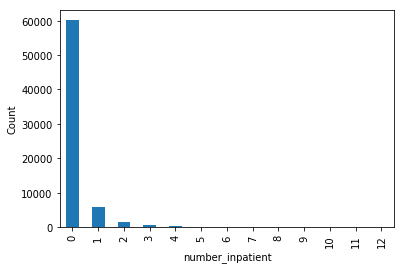

In [91]:
data.groupby('number_inpatient').size().plot(kind='bar')
plt.ylabel('Count')

In [92]:
# keep only 'insulin' and remove the other 22 diabetes medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [93]:
# Recategorize 'age' so that the population is more evenly distributed
data['discharge_disposition_id'] = pd.Series(['Home' if val in [1] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Anather' if val in [2,3,4,5,6] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Expired' if val in [11,19,20,21] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['NaN' if val in [18,25,26] else val
                         for val in data['discharge_disposition_id']], index=data.index)
                        
data['discharge_disposition_id'] = pd.Series(['other' if val in [7,8,9,10,12,13,14,15,16,17,22,23,24,27,28,29,30] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

In [94]:
data.shape

(68357, 24)

In [95]:
pd.unique(data['discharge_disposition_id'].values)

array(['Home', 'Anather', 'Expired', 'other', 'NaN'], dtype=object)

In [96]:
# check NA in 'discharge_disposition_id'
data[data['discharge_disposition_id'] == 'NaN'].shape[0] * 1.0 / data.shape[0]

0.04611085916584988

In [97]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val in [1,2,3] else 
                                         'NaN' if val in [15,17,20,21] else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [98]:
pd.unique(data['admission_source_id'].values)

array(['Emergency Room', 'Referral', 'Other source', 'NaN'], dtype=object)

In [99]:
# check NA in 'discharge_disposition_id'
data[data['admission_source_id'] == 'NaN'].shape[0] * 1.0 / data.shape[0]

0.07226765364190939

In [100]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val in [1,2,7] else val
                         for val in data['admission_type_id']], index=data.index)
data['admission_type_id'] = pd.Series(['NaN' if val in [5,6,8] else val
                         for val in data['admission_type_id']], index=data.index)
data['admission_type_id'] = pd.Series(['Normal' if val in [3,4] else val
                         for val in data['admission_type_id']], index=data.index)

In [101]:
pd.unique(data['admission_type_id'].values)

array(['Emergency', 'Normal', 'NaN'], dtype=object)

In [102]:
# check NA in 'discharge_disposition_id'
data[data['admission_type_id'] == 'NaN'].shape[0] * 1.0 / data.shape[0]

0.11381423994616499

In [103]:
data["age"] = data["age"].astype('category')
data["race"] = data["race"].astype('category')
data["gender"] = data["gender"].astype('category')
data["medical_specialty"] = data["medical_specialty"].astype('category')
data["max_glu_serum"] = data["max_glu_serum"].astype('category')
data["A1Cresult"] = data["A1Cresult"].astype('category')
data["insulin"] = data["insulin"].astype('category')
data["change"] = data["change"].astype('category')
data["diabetesMed"] = data["diabetesMed"].astype('category')
data["discharge_disposition_id"] = data["discharge_disposition_id"].astype('category')
data["admission_source_id"] = data["admission_source_id"].astype('category')
data["admission_type_id"] = data["admission_type_id"].astype('category')
data["diag_1"] = data["diag_1"].astype('category')
data["diag_2"] = data["diag_2"].astype('category')
data["diag_3"] = data["diag_3"].astype('category')

In [104]:
data["age1"] = data["age"].cat.codes
data["race1"] = data["race"].cat.codes
data["gender1"] = data["gender"].cat.codes
data["medical_specialty1"] = data["medical_specialty"].cat.codes
data["max_glu_serum1"] = data["max_glu_serum"].cat.codes
data["A1Cresult1"] = data["A1Cresult"].cat.codes
data["insulin1"] = data["insulin"].cat.codes
data["change1"] = data["change"].cat.codes
data["diabetesMed1"] = data["diabetesMed"].cat.codes
data["discharge_disposition_id1"] = data["discharge_disposition_id"].cat.codes
data["admission_source_id1"] = data["admission_source_id"].cat.codes
data["admission_type_id1"] = data["admission_type_id"].cat.codes
data["diag_11"] = data["diag_1"].cat.codes
data["diag_21"] = data["diag_2"].cat.codes
data["diag_31"] = data["diag_3"].cat.codes



data.drop(['age', 'medical_specialty', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)



In [105]:
# apply square root transformation on right skewed count data to reduce the effects of extreme values.
# here log transformation is not appropriate because the data is Poisson distributed and contains many zero values.
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [106]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [107]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [108]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.cross_validation import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
num_lab_procedures
diag_11
diag_21
diag_31
num_medications
time_in_hospital
medical_specialty1
num_procedures
number_diagnoses
insulin1


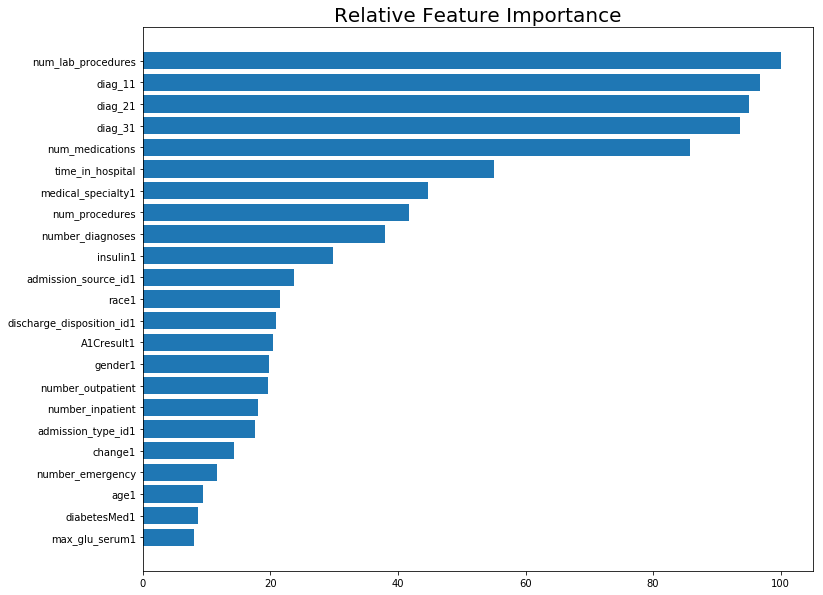

In [109]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [110]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf =  RandomForestClassifier()

In [115]:
#data Preparation
X1 = X
y1 = y
data = pd.concat([X,y], axis = 1)
df = Counter(y)
c = min(y, key=df.get)
d = [i for i,x in enumerate(y) if x == c]  #row index having rare class
d1 = [i for i,x in enumerate(y) if x != c]
Rare_Class_data = data.iloc[d]
Mejor_Class_data = data.iloc[d1]

In [116]:
df = Rare_Class_data
a=Rare_Class_data.shape[0]
b = Mejor_Class_data.shape[0]
n = round(b/a)
sm = SMOTE(random_state=12, ratio = 1.0)
logreg = LogisticRegression()

acc1=0
acc2=0

In [117]:
 for i in range(1,n):
             df1 = Rare_Class_data.copy()
             df = data.append(df1)
             data = df
             n=df.shape[1]
             X1=df.iloc[:,1:(n-2)]
             y1=df.iloc[:,(n-1)]
             
             X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3,random_state=i)
             X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
             rf.fit(X_train_res, y_train_res)
             y_pred = rf.predict(X_test)
             acc1 = rf.score(X_test, y_test)

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, catego

In [118]:
acc1

0.99312603177180592

In [119]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.98625226466838078

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     18688
          1       0.99      1.00      0.99     18263

avg / total       0.99      0.99      0.99     36951



In [121]:
#Random over sampling method
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc2 = rf.score(X_test, y_test)

In [122]:
acc2

0.99242239722876247

In [123]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.98484543127340951

In [124]:
#regular logistic regression Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,  random_state=i)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc3 = rf.score(X_test, y_test) 

In [125]:
acc3

0.91066900721669597

In [126]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.01812981064217889

In [127]:
# knn
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier()

In [128]:
df = Rare_Class_data
a=Rare_Class_data.shape[0]
b = Mejor_Class_data.shape[0]
n = round(b/a)
sm = SMOTE(random_state=12, ratio = 1.0)
clf3 = KNeighborsClassifier()
acc1=0
acc2=0

In [129]:
 for i in range(1,n):
             df1 = Rare_Class_data.copy()
             df = data.append(df1)
             data = df
             n=df.shape[1]
             X1=df.iloc[:,1:(n-2)]
             y1=df.iloc[:,(n-1)]
             
             X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3,random_state=i)
             X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
             clf3.fit(X_train_res, y_train_res)
             y_pred = clf3.predict(X_test)
             acc1 = clf3.score(X_test, y_test)

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, catego

In [130]:
acc1

0.93047908004644719

In [131]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.84016178031847422